In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from PIL import Image
from sklearn.metrics import mean_squared_error, f1_score

# Pandas options
pd.set_option("display.max_columns", 500)
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
1080*1080

1166400

# Redes Neurais Convolucionais (CNNs)

Um **convolutional neural network** (CNN) é um tipo de modelo de **deep learning** projetado para processar dados estruturados em forma de grade, como imagens ou séries temporais. Ele é particularmente eficaz em tarefas de visão computacional, como reconhecimento de imagem e detecção de objetos.

Aqui está uma breve explicação de como um CNN funciona:

1. **Camada de Entrada:** A entrada para um CNN é uma imagem ou uma estrutura de dados em forma de grade, normalmente representada como uma matriz multidimensional de valores de pixel.

2. **Camada Convolucional:** A camada convolucional é o bloco fundamental de construção de um CNN. Ela consiste em vários filtros ou *kernels* que deslizam (convolvem) sobre a imagem de entrada, realizando multiplicação e adição de elementos para produzir um mapa de características. Cada filtro detecta diferentes padrões ou características nos dados de entrada, como bordas, cantos ou texturas.

3. **Função de Ativação:** Após a operação de convolução, uma função de ativação, geralmente ReLU (Rectified Linear Unit), é aplicada elemento a elemento para introduzir não-linearidade na rede. Isso ajuda o modelo a aprender relações complexas nos dados.

4. **Camada de Pooling:** A camada de *pooling* reduz as dimensões espaciais do mapa de características, mantendo as informações mais importantes. Operações de *pooling* comuns incluem *max pooling* ou *average pooling*, onde o valor máximo ou médio dentro de uma região específica é mantido e o restante é descartado.

5. **Achatamento:** A saída da camada de *pooling* é achatada em um vetor unidimensional para ser alimentada nas camadas subsequentes da rede.

6. **Camadas Totalmente Conectadas:** As características achatadas são conectadas a uma ou mais camadas totalmente conectadas, semelhantes às de uma rede neural tradicional. Essas camadas aprendem características e relações em níveis mais altos, combinando informações de toda a entrada.

7. **Camada de Saída:** A camada final do CNN produz a saída desejada com base na tarefa específica. Por exemplo, em classificação de imagem, a camada de saída geralmente consiste em uma ativação softmax para produzir probabilidades de classe.

8. **Treinamento:** Os CNNs são treinados usando *backpropagation*, onde os pesos e vieses do modelo são ajustados iterativamente para minimizar a diferença entre as saídas previstas e reais. Isso é feito otimizando uma função de perda usando técnicas como *gradient descent*.

Ao empilhar várias camadas convolucionais e totalmente conectadas, os CNNs podem aprender representações hierárquicas de características, extraindo automaticamente padrões de baixo nível e gradualmente aprendendo conceitos mais complexos e abstratos. Essa abordagem hierárquica torna os CNNs adequados para tarefas envolvendo dados estruturados em forma de grade, especialmente em aplicações de visão computacional.

## Construindo um modelo para o Fashion MNIST
O conjunto de dados Fashion MNIST é um conjunto de referência popular para tarefas de classificação de imagens na área de visão computacional e aprendizado de máquina. Ele é composto por 70.000 imagens em escala de cinza de 28x28 pixels, divididas em 10 classes diferentes. Cada classe representa um tipo específico de vestuário ou acessório de moda presente nas imagens.

As classes incluídas no conjunto de dados Fashion MNIST são as seguintes:

1. Camiseta/topo
2. Calça
3. Suéter
4. Vestido
5. Casaco
6. Sandália
7. Camisa
8. Tênis
9. Bolsa
10. Bota

O conjunto de treinamento é composto por 60.000 imagens, enquanto o conjunto de teste contém 10.000 imagens. As imagens são equilibradas em relação às classes, o que significa que cada classe possui a mesma quantidade de amostras.

As imagens do Fashion MNIST são em escala de cinza, o que torna o conjunto de dados um pouco mais simples em comparação com conjuntos de dados em cores. No entanto, ele ainda apresenta desafios significativos, pois as imagens incluem uma variedade de padrões, texturas e formas.

O Fashion MNIST foi proposto como um substituto para o conjunto de dados clássico MNIST, que consiste em dígitos manuscritos. Ele foi projetado para ser um conjunto de dados mais realista e desafiador para testar algoritmos e modelos de aprendizado de máquina em tarefas de classificação de imagens.

O conjunto de dados Fashion MNIST pode ser facilmente acessado e baixado através do repositório oficial do [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), onde também estão disponíveis informações adicionais sobre o conjunto de dados e sua formatação. Ele se tornou uma referência importante para a comunidade de pesquisa e é frequentemente utilizado em competições e estudos comparativos.

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

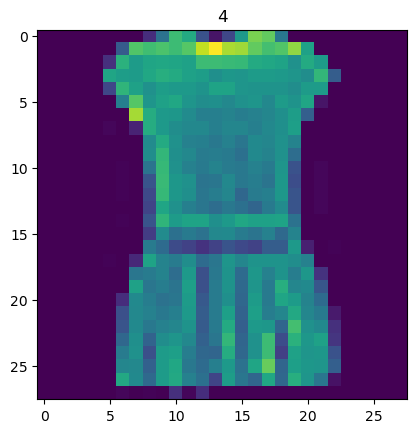

In [28]:
i = 3
plt.imshow(X_train[i,:,:])
plt.title(y_train[i] + 1);

In [15]:
X_train[0,:,:].ravel()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
28*28

784

A forma tradicional de construir um modelo de categorização (ou regressão) utilizando imagens é transforma-las em vetores (através do método `.ravel()` por exemplo). Isso cria uma matriz onde cada pixel da imagem é um feature. Mesmo com imagens pequenas, como no FMNIST, o número de features é muito grande: 28x28. Além de complicar o treinamento (*maldição da dimensionalidade*), essa transformação descarta a informação espacial da imagem:

1. Pontos vizinhos tendem a ter valores próximos;
1. O mesmo objeto pode estar localizado em diferentes partes da imagem - um quadrado preto a esquerda será totalmente diferente de um quadrado preto a direita, embora visualmente sejam iguais.

Para resolver esses dois problemas simultaneamente, utilizaremos uma arquitetura de Rede Neural diferente do MLP: a **Rede Neural Convolucional**. Primeiro, vamos ver o que são convoluções: https://poloclub.github.io/cnn-explainer/.

In [18]:
X_train.shape[1:]

(28, 28)

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
fashion = keras.models.Sequential()

# Camada Convolucional na Entrada
## Precisamos prestar atenção ao argumento input_shape!
conv_1 = keras.layers.Conv2D(
    32, (3, 3),
    activation='relu', 
    input_shape=(28, 28, 1))

fashion.add(conv_1)
fashion.add(keras.layers.Dropout(0.2))
## Achatando a camada convolucional
fashion.add(keras.layers.Flatten())
# Camada Densa
fashion.add(keras.layers.Dense(512, activation='relu'))
fashion.add(keras.layers.Dropout(0.5))
# Camada de Saída
fashion.add(keras.layers.Dense(10, activation='softmax'))

fashion.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = keras.optimizers.legacy.Adam(lr = 1e-2), 
                metrics = ['accuracy'])

Metal device set to: Apple M1


In [21]:
fashion.fit(X_train, y_train, batch_size = 1024, epochs = 10, validation_split=0.1)

Epoch 1/10


2023-06-01 21:00:00.887546: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


53/53 [==============================] - 6s 107ms/step - loss: 180.3794 - accuracy: 0.6703 - val_loss: 0.4935 - val_accuracy: 0.8345
Epoch 2/10
53/53 [==============================] - 5s 103ms/step - loss: 0.5315 - accuracy: 0.8167 - val_loss: 0.4080 - val_accuracy: 0.8585
Epoch 3/10
53/53 [==============================] - 6s 104ms/step - loss: 0.4195 - accuracy: 0.8491 - val_loss: 0.3864 - val_accuracy: 0.8697
Epoch 4/10
53/53 [==============================] - 5s 103ms/step - loss: 0.3717 - accuracy: 0.8656 - val_loss: 0.3783 - val_accuracy: 0.8683
Epoch 5/10
53/53 [==============================] - 6s 105ms/step - loss: 0.3411 - accuracy: 0.8772 - val_loss: 0.3550 - val_accuracy: 0.8730
Epoch 6/10
53/53 [==============================] - 5s 104ms/step - loss: 0.3079 - accuracy: 0.8864 - val_loss: 0.3563 - val_accuracy: 0.8780
Epoch 7/10
53/53 [==============================] - 5s 102ms/step - loss: 0.2853 - accuracy: 0.8947 - val_loss: 0.3556 - val_accuracy: 0.8793
Epoch 8/10
53/5

Vamos utilizar nosso conjunto de teste para avaliar a performance do nosso modelo através do F1-Score Macro (a média do F1-Score de cada classe). No entanto, precisamos lembrar que o método `.predict()` de nosso modelo não retornará a classe prevista mas a matriz de probabilidades:

In [22]:
fashion_pred = fashion.predict(X_test)
fashion_pred

313/313 [==============================] - 1s 4ms/step


array([[6.4435452e-15, 1.7932960e-14, 3.9982889e-14, ..., 7.1917341e-08,
        3.8666878e-14, 9.9999988e-01],
       [1.7992980e-04, 5.3733096e-08, 9.9853456e-01, ..., 5.2762818e-11,
        6.1118972e-09, 2.7735035e-11],
       [2.1903167e-15, 1.0000000e+00, 7.2594757e-22, ..., 1.1974052e-22,
        2.1581649e-19, 6.2777195e-35],
       ...,
       [2.4891653e-10, 3.6816995e-12, 2.5929204e-08, ..., 2.0131671e-10,
        9.9998820e-01, 2.3086658e-07],
       [1.0967308e-13, 1.0000000e+00, 4.0408075e-18, ..., 2.0847570e-17,
        1.1439449e-16, 2.1588889e-27],
       [8.5270433e-03, 9.9808944e-04, 7.1527450e-03, ..., 2.7026016e-02,
        1.5536143e-02, 4.0955521e-02]], dtype=float32)

Vamos utilizar a função `np.argmax()` para obter a classe prevista (a mais provável):

In [23]:
fashion_pred_class = np.argmax(fashion_pred, axis = 1)
fashion_pred_class

array([9, 2, 1, ..., 8, 1, 5])

In [24]:
print(f"F1-Score Macro: {f1_score(y_test, fashion_pred_class, average = 'macro')}")

F1-Score Macro: 0.8741076479654895


Podemos melhorar (e muito) esse modelo mudando a arquitetura de nossa rede - você pode testar isso mudando o número de camadas, o número de neurônios, o tamanho do kernel, etc. Vamos seguir para o próximo problema, o CIFAR-10.

## Construindo um modelo para CIFAR-10

O conjunto de dados CIFAR-10 é uma das referências mais populares para testar algoritmos de visão computacional e aprendizado de máquina. Ele é composto por 60.000 imagens coloridas de 32x32 pixels, divididas em 10 classes diferentes. Cada classe representa um tipo específico de objeto ou animal presente nas imagens.

As classes incluídas no conjunto de dados são as seguintes:

1. Avião
2. Automóvel
3. Pássaro
4. Gato
5. Cervo
6. Cachorro
7. Sapo
8. Cavalo
9. Navio
10. Caminhão

O conjunto de treinamento é composto por 50.000 imagens, sendo 5.000 imagens de cada classe. Já o conjunto de teste contém 10.000 imagens, sendo 1.000 imagens de cada classe. As imagens são equilibradas em relação às classes, o que significa que cada classe possui a mesma quantidade de amostras.

As imagens do CIFAR-10 são relativamente pequenas, com baixa resolução, mas apresentam uma variedade de objetos e fundos complexos. Essa característica torna o conjunto de dados desafiador para algoritmos de classificação, exigindo o desenvolvimento de técnicas de extração de recursos eficientes e robustas.

O CIFAR-10 é amplamente utilizado em pesquisas acadêmicas e competições de aprendizado de máquina, permitindo a comparação de desempenho de algoritmos e modelos. Ele fornece uma plataforma para avaliar e comparar diferentes abordagens de classificação de imagens em um cenário realista.

O conjunto de dados CIFAR-10 pode ser facilmente acessado e baixado através do site oficial da [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html), onde também estão disponíveis informações adicionais sobre o conjunto de dados e sua formatação.

In [30]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

Vamos visualizar algumas dessas imagens:

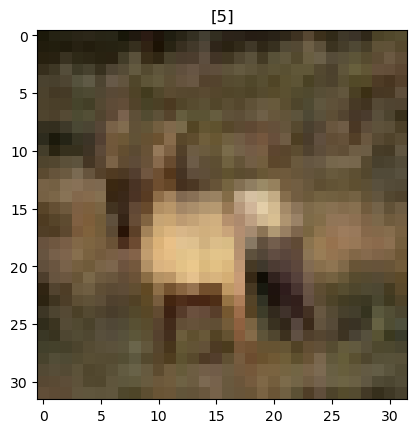

In [31]:
i = 3
plt.imshow(X_train[i,:,:])
plt.title(y_train[i] + 1);

Como podemos ver o CIFAR-10 apresenta um desafio muito maior que o FMNIST. Vamos construir um modelo de CNN para esse conjunto de dados:

1. As imagens são coloridas, ou seja, uma imagem 32x32 conterá 32x32x3 = 3072 features;
1. As imagens são mais complexas, com mais detalhes e mais variações de fundo e iluminação;

Não podemos continuar com uma rede simples como a que utilizamos para o FMNIST - vamos nos apropriar de uma arquitetura tradicional de CNNs: a rede LeNet. Essa arquitetura estrutura a rede através de múltiplos **blocos** de camadas convolucionais, de pooling e dropout antes de achatar nossos feature maps e passar para uma rede MLP tradicional. Além disso, vamos utilizar mais um *truque* além do `Dropout`: o `BatchNormalization`. Essa técnica normaliza os valores de ativação de cada camada entre batches, o que ajuda a evitar o problema do *vanishing gradient* e acelera o treinamento.

In [32]:
cifar = keras.models.Sequential()

# Camada Convolucional na Entrada
cifar.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cifar.add(keras.layers.BatchNormalization())
# Primeiro bloco de convoluções

cifar.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cifar.add(keras.layers.BatchNormalization())
cifar.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar.add(keras.layers.Dropout(0.2))
# Segundo bloco de convoluções
## Note como aumentamos o número de feature maps
## de 32 para 64: isso é uma técnica comum em CNNs
cifar.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cifar.add(keras.layers.BatchNormalization())
cifar.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar.add(keras.layers.Dropout(0.2))
# Terceiro bloco de convoluções
cifar.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
cifar.add(keras.layers.BatchNormalization())
cifar.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar.add(keras.layers.Dropout(0.2))
# Achatando camadas
cifar.add(keras.layers.Flatten())
# Camada Densa
cifar.add(keras.layers.Dense(128, activation='relu'))
cifar.add(keras.layers.Dropout(0.5))
# Camada de Saída
## Lembrando que essa camada deve ter o mesmo número de neurônios
## que nossa variável target possui categorias
cifar.add(keras.layers.Dense(10, activation='softmax'))
cifar.compile(loss = 'sparse_categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(lr = 1e-2), metrics = ['accuracy'])

In [33]:
cifar.fit(X_train, y_train.ravel(), batch_size = 1024, epochs = 10, validation_split=0.1)

Epoch 1/10
44/44 [==============================] - 10s 199ms/step - loss: 2.1125 - accuracy: 0.2799 - val_loss: 3.3646 - val_accuracy: 0.1000
Epoch 2/10
44/44 [==============================] - 9s 192ms/step - loss: 1.6414 - accuracy: 0.3989 - val_loss: 1.9691 - val_accuracy: 0.2440
Epoch 3/10
44/44 [==============================] - 8s 189ms/step - loss: 1.4892 - accuracy: 0.4596 - val_loss: 1.5928 - val_accuracy: 0.4474
Epoch 4/10
44/44 [==============================] - 8s 183ms/step - loss: 1.3650 - accuracy: 0.5097 - val_loss: 1.5920 - val_accuracy: 0.4598
Epoch 5/10
44/44 [==============================] - 8s 186ms/step - loss: 1.2827 - accuracy: 0.5454 - val_loss: 1.3209 - val_accuracy: 0.5188
Epoch 6/10
44/44 [==============================] - 8s 182ms/step - loss: 1.1862 - accuracy: 0.5807 - val_loss: 1.3220 - val_accuracy: 0.5392
Epoch 7/10
44/44 [==============================] - 8s 180ms/step - loss: 1.1121 - accuracy: 0.6094 - val_loss: 1.0167 - val_accuracy: 0.6330
Epoch

In [34]:
cifar_pred = cifar.predict(X_test)
cifar_pred_class = np.argmax(cifar_pred, axis = 1)
print(f"F1-Score Macro: {f1_score(y_test, cifar_pred_class, average = 'macro')}")

313/313 [==============================] - 2s 4ms/step
F1-Score Macro: 0.5689676345356594


Para efeito de comparação, vamos testar a mesma arquitetura que utilizamos no FMNIST no CIFAR:

In [35]:
cifar_simples = keras.models.Sequential()

# Camada Convolucional na Entrada
## Precisamos prestar atenção ao argumento input_shape!
cifar_simples.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cifar_simples.add(keras.layers.Dropout(0.2))
## Achatando a camada convolucional
cifar_simples.add(keras.layers.Flatten())
# Camada Densa
cifar_simples.add(keras.layers.Dense(512, activation='relu'))
cifar_simples.add(keras.layers.Dropout(0.5))
# Camada de Saída
cifar_simples.add(keras.layers.Dense(10, activation='softmax'))

cifar_simples.compile(loss = 'sparse_categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(lr = 1e-2), metrics = ['accuracy'])
cifar_simples.fit(X_train, y_train.ravel(), batch_size = 1024, epochs = 10, validation_split=0.1)
cifar_pred = cifar_simples.predict(X_test)
cifar_pred_class = np.argmax(cifar_pred, axis = 1)
print(f"F1-Score Macro: {f1_score(y_test, cifar_pred_class, average = 'macro')}")

Epoch 1/10
44/44 [==============================] - 7s 150ms/step - loss: 469.7701 - accuracy: 0.1026 - val_loss: 2.3318 - val_accuracy: 0.0966
Epoch 2/10
44/44 [==============================] - 6s 135ms/step - loss: 2.3133 - accuracy: 0.1030 - val_loss: 2.3158 - val_accuracy: 0.0984
Epoch 3/10
44/44 [==============================] - 6s 139ms/step - loss: 2.3068 - accuracy: 0.0999 - val_loss: 2.3229 - val_accuracy: 0.0992
Epoch 4/10
44/44 [==============================] - 6s 136ms/step - loss: 2.3009 - accuracy: 0.1036 - val_loss: 2.3226 - val_accuracy: 0.1056
Epoch 5/10
44/44 [==============================] - 6s 135ms/step - loss: 2.2991 - accuracy: 0.1029 - val_loss: 2.3220 - val_accuracy: 0.0978
Epoch 6/10
44/44 [==============================] - 6s 134ms/step - loss: 2.2967 - accuracy: 0.1026 - val_loss: 2.3253 - val_accuracy: 0.0994
Epoch 7/10
44/44 [==============================] - 6s 135ms/step - loss: 2.2941 - accuracy: 0.1031 - val_loss: 2.3439 - val_accuracy: 0.1008
Epoc

Como imaginamos, o modelo mais simples é muito pior que o modelo mais complexo. Podemos melhorar ainda mais esse resultado utilizando um outro tipo de bloco, com duas camadas de convolução:

```python
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
```

Poderíamos substituir cada um dos blocos em nossa rede por esse tipo de bloco - isso aumentaria o número de parâmetros e o tempo de treinamento, mas também aumentaria a capacidade de nosso modelo!

# Redes Neurais Profundas com Dados Híbridos

House Pricing w/ Images: https://www.kaggle.com/datasets/ted8080/house-prices-and-images-socal

## Preparando os Dados

In [36]:
tb_housing = pd.read_csv("data/california_housing/tb_pricing.csv")
tb_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.2+ KB


In [37]:
tb_housing.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [38]:
image_list = []
image_shape = []
invalid_image = []
for image in tb_housing["image_id"]:
    filename = f"{str(image)}.jpg"
    image = Image.open(
        os.path.join("data/california_housing/images", filename)
    ).convert(mode="RGB")
    resize_image = image.resize((80, 60))
    image_list.append(np.array(resize_image).ravel())

In [39]:
tb_image = np.array(image_list)
tb_image.shape


(15474, 14400)

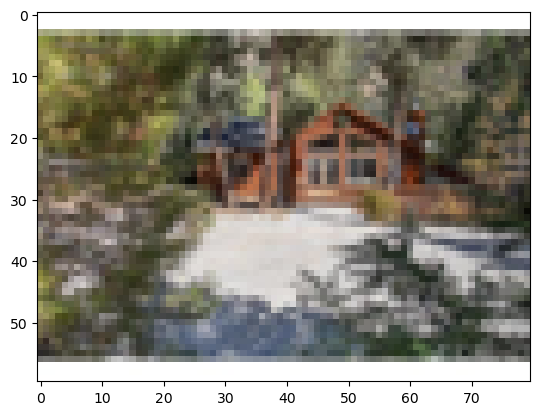

In [44]:
plt.imshow(tb_image[110].reshape(60, 80, 3))


In [45]:
train_index = tb_housing.sample(frac=0.8, random_state=42).index
test_index = tb_housing[~tb_housing.index.isin(train_index)].index


In [48]:
test_index

Index([    1,     4,     5,     9,    11,    13,    16,    21,    38,    54,
       ...
       15441, 15445, 15446, 15448, 15450, 15451, 15454, 15457, 15460, 15471],
      dtype='int64', length=3095)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


cat_vars = ["n_citi"]
num_vars = ["bed", "bath", "sqft"]

# Categorical Pipeline
ohe = OneHotEncoder(
    min_frequency=10, handle_unknown="infrequent_if_exist", sparse=False
)
# Numerical Pipeline
sca = StandardScaler()

data_prep = ColumnTransformer([("ohe", ohe, cat_vars), ("sca", sca, num_vars)])

tb_train = tb_housing.loc[train_index]
tb_test = tb_housing.loc[test_index]

X_tb_train = data_prep.fit_transform(tb_train)
X_tb_test = data_prep.transform(tb_test)
y_train = tb_train.loc[train_index, "price"]
y_test = tb_test.loc[test_index, "price"]

In [50]:
X_img_train = tb_image[train_index,:]
X_img_test = tb_image[test_index,:]

In [51]:
del cifar, cifar_pred, cifar_simples, fashion, image_list

## Criando Rede Neural com Variáveis Estruturadas


In [52]:
num_model = keras.models.Sequential()
num_model.add(
    keras.layers.Dense(30, activation="relu", input_dim=X_tb_train.shape[1])
)
num_model.add(keras.layers.Dropout(0.2))
num_model.add(keras.layers.Dense(30, activation="relu"))
num_model.add(keras.layers.Dense(1))

# Para Windows (ou Linux e versões futuras do TF)
# num_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(lr=1e-3))
num_model.compile(loss="mean_squared_error", 
                  optimizer=keras.optimizers.legacy.Adam(lr=1e-2), 
                  metrics=[keras.metrics.RootMeanSquaredError()])
h = num_model.fit(X_tb_train, np.array(y_train), epochs = 200, batch_size = 1024, validation_split = 0.1)

Epoch 1/200
11/11 [==============================] - 1s 30ms/step - loss: 641191903232.0000 - root_mean_squared_error: 800744.5625 - val_loss: 610982887424.0000 - val_root_mean_squared_error: 781653.9375
Epoch 2/200
11/11 [==============================] - 0s 11ms/step - loss: 641179123712.0000 - root_mean_squared_error: 800736.6250 - val_loss: 610958114816.0000 - val_root_mean_squared_error: 781638.1250
Epoch 3/200
11/11 [==============================] - 0s 11ms/step - loss: 641131151360.0000 - root_mean_squared_error: 800706.6875 - val_loss: 610879930368.0000 - val_root_mean_squared_error: 781588.0625
Epoch 4/200
11/11 [==============================] - 0s 12ms/step - loss: 641002110976.0000 - root_mean_squared_error: 800626.0000 - val_loss: 610690072576.0000 - val_root_mean_squared_error: 781466.6250
Epoch 5/200
11/11 [==============================] - 0s 11ms/step - loss: 640714473472.0000 - root_mean_squared_error: 800446.4375 - val_loss: 610305179648.0000 - val_root_mean_squared

11/11 [==============================] - 0s 10ms/step - loss: 138647257088.0000 - root_mean_squared_error: 372353.6875 - val_loss: 122409451520.0000 - val_root_mean_squared_error: 349870.6250
Epoch 42/200
11/11 [==============================] - 0s 10ms/step - loss: 131192651776.0000 - root_mean_squared_error: 362205.2500 - val_loss: 116789600256.0000 - val_root_mean_squared_error: 341744.9375
Epoch 43/200
11/11 [==============================] - 0s 10ms/step - loss: 127551537152.0000 - root_mean_squared_error: 357143.5625 - val_loss: 112069877760.0000 - val_root_mean_squared_error: 334768.4062
Epoch 44/200
11/11 [==============================] - 0s 9ms/step - loss: 122148446208.0000 - root_mean_squared_error: 349497.4062 - val_loss: 108031762432.0000 - val_root_mean_squared_error: 328681.8438
Epoch 45/200
11/11 [==============================] - 0s 10ms/step - loss: 119711539200.0000 - root_mean_squared_error: 345993.5625 - val_loss: 104589942784.0000 - val_root_mean_squared_error: 3

11/11 [==============================] - 0s 10ms/step - loss: 68097785856.0000 - root_mean_squared_error: 260955.5312 - val_loss: 59645403136.0000 - val_root_mean_squared_error: 244224.0781
Epoch 82/200
11/11 [==============================] - 0s 9ms/step - loss: 67510493184.0000 - root_mean_squared_error: 259827.8125 - val_loss: 59249856512.0000 - val_root_mean_squared_error: 243412.9375
Epoch 83/200
11/11 [==============================] - 0s 10ms/step - loss: 66774626304.0000 - root_mean_squared_error: 258407.8750 - val_loss: 58878894080.0000 - val_root_mean_squared_error: 242649.7500
Epoch 84/200
11/11 [==============================] - 0s 10ms/step - loss: 65851826176.0000 - root_mean_squared_error: 256616.1094 - val_loss: 58500399104.0000 - val_root_mean_squared_error: 241868.5625
Epoch 85/200
11/11 [==============================] - 0s 9ms/step - loss: 64631492608.0000 - root_mean_squared_error: 254227.2500 - val_loss: 58187747328.0000 - val_root_mean_squared_error: 241221.3594


11/11 [==============================] - 0s 10ms/step - loss: 59211448320.0000 - root_mean_squared_error: 243334.0312 - val_loss: 53170970624.0000 - val_root_mean_squared_error: 230588.3125
Epoch 122/200
11/11 [==============================] - 0s 9ms/step - loss: 57400102912.0000 - root_mean_squared_error: 239583.1875 - val_loss: 53158555648.0000 - val_root_mean_squared_error: 230561.3906
Epoch 123/200
11/11 [==============================] - 0s 9ms/step - loss: 57834004480.0000 - root_mean_squared_error: 240487.0156 - val_loss: 53124124672.0000 - val_root_mean_squared_error: 230486.7188
Epoch 124/200
11/11 [==============================] - 0s 9ms/step - loss: 57671393280.0000 - root_mean_squared_error: 240148.6719 - val_loss: 53084635136.0000 - val_root_mean_squared_error: 230401.0156
Epoch 125/200
11/11 [==============================] - 0s 10ms/step - loss: 56946921472.0000 - root_mean_squared_error: 238635.5469 - val_loss: 53045665792.0000 - val_root_mean_squared_error: 230316.45

11/11 [==============================] - 0s 10ms/step - loss: 56437035008.0000 - root_mean_squared_error: 237564.7969 - val_loss: 52516716544.0000 - val_root_mean_squared_error: 229165.2656
Epoch 162/200
11/11 [==============================] - 0s 10ms/step - loss: 55844261888.0000 - root_mean_squared_error: 236313.9062 - val_loss: 52514103296.0000 - val_root_mean_squared_error: 229159.5625
Epoch 163/200
11/11 [==============================] - 0s 10ms/step - loss: 56508915712.0000 - root_mean_squared_error: 237716.0469 - val_loss: 52515876864.0000 - val_root_mean_squared_error: 229163.4531
Epoch 164/200
11/11 [==============================] - 0s 10ms/step - loss: 56103800832.0000 - root_mean_squared_error: 236862.4219 - val_loss: 52478382080.0000 - val_root_mean_squared_error: 229081.6094
Epoch 165/200
11/11 [==============================] - 0s 11ms/step - loss: 55263883264.0000 - root_mean_squared_error: 235082.7188 - val_loss: 52491952128.0000 - val_root_mean_squared_error: 229111

<Axes: xlabel='epoch', ylabel='train_rmse'>

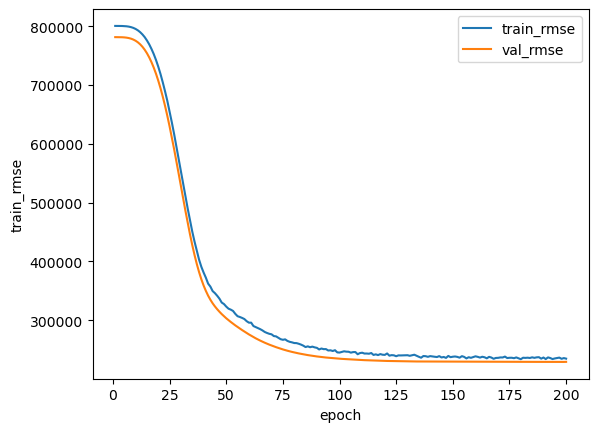

In [53]:
tb_num_model = pd.DataFrame(h.history)
tb_num_model["epoch"] = tb_num_model.index + 1
tb_num_model["train_rmse"] = np.sqrt(tb_num_model["loss"])
tb_num_model["val_rmse"] = np.sqrt(tb_num_model["val_loss"])
sns.lineplot(data=tb_num_model, x = "epoch", y = "train_rmse", label = "train_rmse")
sns.lineplot(data=tb_num_model, x = "epoch", y = "val_rmse", label = "val_rmse")

In [54]:
y_test_pred = num_model.predict(X_tb_test)
print(f"MAPE: {np.sqrt(mean_squared_error(y_test, y_test_pred))/y_test.mean()}")

97/97 [==============================] - 0s 2ms/step
MAPE: 0.3301087059333413


### Introduzindo Callbacks

In [55]:
num_model_cb = keras.models.Sequential()
num_model_cb.add(
    keras.layers.Dense(30, activation="relu", input_dim=X_tb_train.shape[1])
)
num_model_cb.add(keras.layers.Dropout(0.5))
num_model_cb.add(keras.layers.Dense(30, activation="relu"))
num_model_cb.add(keras.layers.Dense(1))

# Criando o callback
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# Para Windows (ou Linux e versões futuras do TF)
# num_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(lr=1e-3))
num_model_cb.compile(loss="mean_squared_error", optimizer=keras.optimizers.legacy.Adam(lr=1e-2), metrics=[keras.metrics.RootMeanSquaredError()])

h = num_model_cb.fit(X_tb_train, np.array(y_train), epochs = 200, batch_size = 1024, validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/200
11/11 [==============================] - 1s 29ms/step - loss: 641192427520.0000 - root_mean_squared_error: 800744.9375 - val_loss: 610984394752.0000 - val_root_mean_squared_error: 781654.8750
Epoch 2/200
11/11 [==============================] - 0s 11ms/step - loss: 641183711232.0000 - root_mean_squared_error: 800739.4375 - val_loss: 610967289856.0000 - val_root_mean_squared_error: 781643.9375
Epoch 3/200
11/11 [==============================] - 0s 11ms/step - loss: 641150812160.0000 - root_mean_squared_error: 800718.9375 - val_loss: 610912829440.0000 - val_root_mean_squared_error: 781609.1250
Epoch 4/200
11/11 [==============================] - 0s 12ms/step - loss: 641061289984.0000 - root_mean_squared_error: 800663.0625 - val_loss: 610778284032.0000 - val_root_mean_squared_error: 781523.0625
Epoch 5/200
11/11 [==============================] - 0s 10ms/step - loss: 640861536256.0000 - root_mean_squared_error: 800538.1875 - val_loss: 610496086016.0000 - val_root_mean_squared

11/11 [==============================] - 0s 11ms/step - loss: 171589337088.0000 - root_mean_squared_error: 414233.4375 - val_loss: 138109468672.0000 - val_root_mean_squared_error: 371630.8125
Epoch 42/200
11/11 [==============================] - 0s 11ms/step - loss: 161298743296.0000 - root_mean_squared_error: 401620.1562 - val_loss: 129532305408.0000 - val_root_mean_squared_error: 359905.9688
Epoch 43/200
11/11 [==============================] - 0s 10ms/step - loss: 153721470976.0000 - root_mean_squared_error: 392073.3125 - val_loss: 122110148608.0000 - val_root_mean_squared_error: 349442.6250
Epoch 44/200
11/11 [==============================] - 0s 10ms/step - loss: 149599027200.0000 - root_mean_squared_error: 386780.3438 - val_loss: 115393896448.0000 - val_root_mean_squared_error: 339696.7812
Epoch 45/200
11/11 [==============================] - 0s 11ms/step - loss: 143462891520.0000 - root_mean_squared_error: 378764.9688 - val_loss: 109451476992.0000 - val_root_mean_squared_error: 

11/11 [==============================] - 0s 11ms/step - loss: 85963579392.0000 - root_mean_squared_error: 293195.4688 - val_loss: 61086576640.0000 - val_root_mean_squared_error: 247156.9844
Epoch 82/200
11/11 [==============================] - 0s 11ms/step - loss: 84791459840.0000 - root_mean_squared_error: 291189.7188 - val_loss: 60765294592.0000 - val_root_mean_squared_error: 246506.1719
Epoch 83/200
11/11 [==============================] - 0s 10ms/step - loss: 83138240512.0000 - root_mean_squared_error: 288337.0312 - val_loss: 60428386304.0000 - val_root_mean_squared_error: 245821.8438
Epoch 84/200
11/11 [==============================] - 0s 10ms/step - loss: 83944734720.0000 - root_mean_squared_error: 289732.1875 - val_loss: 60119986176.0000 - val_root_mean_squared_error: 245193.7656
Epoch 85/200
11/11 [==============================] - 0s 10ms/step - loss: 83736117248.0000 - root_mean_squared_error: 289371.9062 - val_loss: 59825111040.0000 - val_root_mean_squared_error: 244591.718

11/11 [==============================] - 0s 10ms/step - loss: 75706179584.0000 - root_mean_squared_error: 275147.5312 - val_loss: 54632660992.0000 - val_root_mean_squared_error: 233736.3125
Epoch 122/200
11/11 [==============================] - 0s 10ms/step - loss: 75317477376.0000 - root_mean_squared_error: 274440.3125 - val_loss: 54589685760.0000 - val_root_mean_squared_error: 233644.3594
Epoch 123/200
11/11 [==============================] - 0s 10ms/step - loss: 75900534784.0000 - root_mean_squared_error: 275500.5312 - val_loss: 54500675584.0000 - val_root_mean_squared_error: 233453.7812
Epoch 124/200
11/11 [==============================] - 0s 10ms/step - loss: 72947957760.0000 - root_mean_squared_error: 270088.7812 - val_loss: 54442790912.0000 - val_root_mean_squared_error: 233329.7969
Epoch 125/200
11/11 [==============================] - 0s 11ms/step - loss: 74096099328.0000 - root_mean_squared_error: 272206.0000 - val_loss: 54405820416.0000 - val_root_mean_squared_error: 233250

11/11 [==============================] - 0s 10ms/step - loss: 70641147904.0000 - root_mean_squared_error: 265784.0312 - val_loss: 53461008384.0000 - val_root_mean_squared_error: 231216.3594
Epoch 162/200
11/11 [==============================] - 0s 10ms/step - loss: 70801596416.0000 - root_mean_squared_error: 266085.6875 - val_loss: 53472153600.0000 - val_root_mean_squared_error: 231240.4688
Epoch 163/200
11/11 [==============================] - 0s 11ms/step - loss: 71322124288.0000 - root_mean_squared_error: 267062.0312 - val_loss: 53487366144.0000 - val_root_mean_squared_error: 231273.3594
Epoch 164/200
11/11 [==============================] - 0s 11ms/step - loss: 70499639296.0000 - root_mean_squared_error: 265517.6875 - val_loss: 53484261376.0000 - val_root_mean_squared_error: 231266.6406
Epoch 165/200
11/11 [==============================] - 0s 10ms/step - loss: 70109749248.0000 - root_mean_squared_error: 264782.4688 - val_loss: 53418577920.0000 - val_root_mean_squared_error: 231124

<Axes: xlabel='epoch', ylabel='train_rmse'>

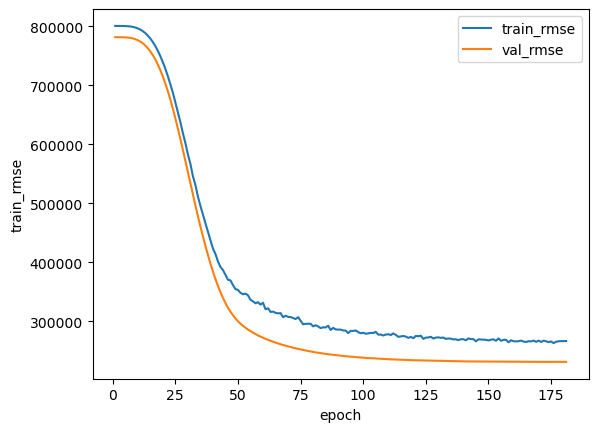

In [56]:
tb_num_model = pd.DataFrame(h.history)
tb_num_model["epoch"] = tb_num_model.index + 1
tb_num_model["train_rmse"] = np.sqrt(tb_num_model["loss"])
tb_num_model["val_rmse"] = np.sqrt(tb_num_model["val_loss"])
sns.lineplot(data=tb_num_model, x = "epoch", y = "train_rmse", label = "train_rmse")
sns.lineplot(data=tb_num_model, x = "epoch", y = "val_rmse", label = "val_rmse")

In [57]:
y_test_pred = num_model.predict(X_tb_test)
print(f"MAPE: {np.sqrt(mean_squared_error(y_test, y_test_pred))/y_test.mean()}")

97/97 [==============================] - 0s 2ms/step
MAPE: 0.3301087059333413


## Criando Rede Neural Convolucional (Trabalhando com Imagens)

In [58]:
img_model = keras.models.Sequential(
    [
        # Camadas de entrada
        keras.layers.Reshape((60, 80, 3)),
        keras.layers.Rescaling(1.0 / 255),
        # Camadas convolucionais (ao estilo LeNet)
        ## Primeiro nível
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.2),
        ## Segundo nível
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.3),
        ## Achatando antes das camadas densas
        keras.layers.Flatten(),
        # Camadas densas
        keras.layers.Dense(1),
    ]
)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
img_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.legacy.Adam(lr=1e-2), metrics=[keras.metrics.RootMeanSquaredError()])
h = img_model.fit(X_img_train, np.array(y_train), epochs = 100, batch_size = 64, validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/100
175/175 [==============================] - 7s 35ms/step - loss: 215698423808.0000 - root_mean_squared_error: 464433.4375 - val_loss: 142482718720.0000 - val_root_mean_squared_error: 377468.8438
Epoch 2/100
175/175 [==============================] - 6s 33ms/step - loss: 156710764544.0000 - root_mean_squared_error: 395867.0938 - val_loss: 142727315456.0000 - val_root_mean_squared_error: 377792.6875
Epoch 3/100
175/175 [==============================] - 6s 33ms/step - loss: 152526848000.0000 - root_mean_squared_error: 390546.8438 - val_loss: 137134456832.0000 - val_root_mean_squared_error: 370316.6875
Epoch 4/100
175/175 [==============================] - 6s 33ms/step - loss: 150144335872.0000 - root_mean_squared_error: 387484.6250 - val_loss: 134270091264.0000 - val_root_mean_squared_error: 366428.8438
Epoch 5/100
175/175 [==============================] - 6s 33ms/step - loss: 147160317952.0000 - root_mean_squared_error: 383614.8125 - val_loss: 130882854912.0000 - val_root_me

Epoch 41/100
175/175 [==============================] - 6s 33ms/step - loss: 130771484672.0000 - root_mean_squared_error: 361623.4062 - val_loss: 123045142528.0000 - val_root_mean_squared_error: 350777.9062
Epoch 42/100
175/175 [==============================] - 6s 32ms/step - loss: 131433578496.0000 - root_mean_squared_error: 362537.6875 - val_loss: 122607271936.0000 - val_root_mean_squared_error: 350153.2188
Epoch 43/100
175/175 [==============================] - 6s 32ms/step - loss: 130746785792.0000 - root_mean_squared_error: 361589.2500 - val_loss: 121762701312.0000 - val_root_mean_squared_error: 348945.1250
Epoch 44/100
175/175 [==============================] - 6s 33ms/step - loss: 130475458560.0000 - root_mean_squared_error: 361213.8750 - val_loss: 122326163456.0000 - val_root_mean_squared_error: 349751.5625
Epoch 45/100
175/175 [==============================] - 6s 32ms/step - loss: 131566215168.0000 - root_mean_squared_error: 362720.5625 - val_loss: 122780827648.0000 - val_ro

<Axes: xlabel='epoch', ylabel='train_rmse'>

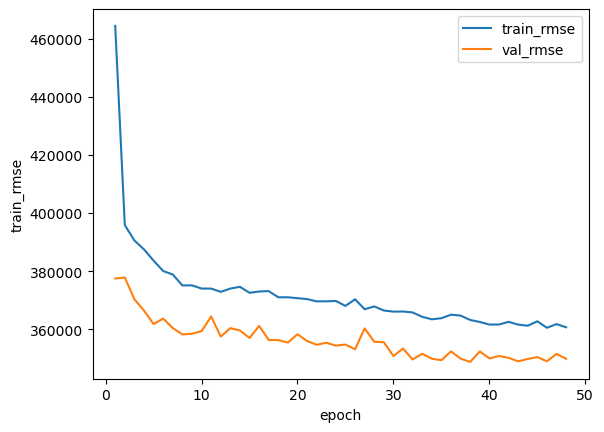

In [59]:
tb_img_model = pd.DataFrame(h.history)
tb_img_model["epoch"] = tb_img_model.index + 1
tb_img_model["train_rmse"] = np.sqrt(tb_img_model["loss"])
tb_img_model["val_rmse"] = np.sqrt(tb_img_model["val_loss"])
sns.lineplot(data=tb_img_model, x = "epoch", y = "train_rmse", label = "train_rmse")
sns.lineplot(data=tb_img_model, x = "epoch", y = "val_rmse", label = "val_rmse")

In [60]:
y_test_pred = img_model.predict(X_img_test)
print(f"MAPE: {np.sqrt(mean_squared_error(y_test, y_test_pred))/y_test.mean()}")

97/97 [==============================] - 1s 9ms/step
MAPE: 0.5079752958717586


## Utilizando a `Funtional API` do Keras para Construir Modelos Complexos

In [ ]:
# Rede Numérica
input_num = keras.layers.Input(shape=X_tb_train.shape[1], name = "wide_input")
wide_1 = keras.layers.Dense(30, activation="relu", name = "wide_h1")(input_num)
wide_drop_1 = keras.layers.Dropout(0.2, name = "wide_dropout1")(wide_1)
wide_2 = keras.layers.Dense(30, activation="relu", name = "wide_h2")(wide_drop_1)

In [61]:
# Rede de Imagem
# Camadas de entrada
input_img = keras.layers.Input(shape=X_img_train.shape[1], name = "deep_input")
deep_reshape = keras.layers.Reshape((60, 80, 3))(input_img)
deep_rescale = keras.layers.Rescaling(1.0 / 255)(deep_reshape)
# Primeiro bloco
deep_conv_1 = keras.layers.Conv2D(32, 3, activation="relu", name = "deep_conv1")(deep_rescale)
deep_pool_1 = keras.layers.MaxPooling2D(pool_size=(2, 2), name = "deep_pool1")(deep_conv_1)
deep_drop_1 = keras.layers.Dropout(0.2, name = "deep_dropout1")(deep_pool_1)
# Segundo bloco
deep_conv_2 = keras.layers.Conv2D(64, 3, activation="relu", name = "deep_conv2")(deep_drop_1)
deep_pool_2 = keras.layers.MaxPooling2D(pool_size=(2, 2), name = "deep_pool2")(deep_conv_2)
deep_drop_2 = keras.layers.Dropout(0.3, name = "deep_dropout2")(deep_pool_2)
# Achatando antes das camadas densas
deep_flat = keras.layers.Flatten(name = "deep_flat")(deep_drop_2)

# Concatenando Rede Convolucional e MLP
concat = keras.layers.concatenate([wide_2, deep_flat])
output = keras.layers.Dense(1, name = "output")(concat)

full_model = keras.models.Model(inputs=[input_num, input_img], outputs=[output])

full_model.compile(loss="mean_squared_error", 
                   optimizer=keras.optimizers.legacy.Adam(lr=1e-3), 
                   metrics=[keras.metrics.RootMeanSquaredError()])

In [62]:
h = full_model.fit([X_tb_train, X_img_train], np.array(y_train), epochs = 100, batch_size = 64, validation_split = 0.1, callbacks=[early_stopping])

Epoch 1/100
175/175 [==============================] - 7s 35ms/step - loss: 214468984832.0000 - root_mean_squared_error: 463107.9688 - val_loss: 133544280064.0000 - val_root_mean_squared_error: 365437.0938
Epoch 2/100
175/175 [==============================] - 6s 32ms/step - loss: 120802820096.0000 - root_mean_squared_error: 347567.0000 - val_loss: 93458817024.0000 - val_root_mean_squared_error: 305710.3438
Epoch 3/100
175/175 [==============================] - 6s 32ms/step - loss: 92491194368.0000 - root_mean_squared_error: 304123.6562 - val_loss: 81230635008.0000 - val_root_mean_squared_error: 285009.8750
Epoch 4/100
175/175 [==============================] - 6s 33ms/step - loss: 80176889856.0000 - root_mean_squared_error: 283155.2500 - val_loss: 71430201344.0000 - val_root_mean_squared_error: 267264.2812
Epoch 5/100
175/175 [==============================] - 6s 33ms/step - loss: 71602388992.0000 - root_mean_squared_error: 267586.2188 - val_loss: 65097990144.0000 - val_root_mean_squa

Epoch 41/100
175/175 [==============================] - 6s 32ms/step - loss: 47249797120.0000 - root_mean_squared_error: 217370.1875 - val_loss: 49377234944.0000 - val_root_mean_squared_error: 222209.8906
Epoch 42/100
175/175 [==============================] - 6s 32ms/step - loss: 46975811584.0000 - root_mean_squared_error: 216739.0469 - val_loss: 51371425792.0000 - val_root_mean_squared_error: 226652.6562
Epoch 43/100
175/175 [==============================] - 6s 32ms/step - loss: 47346348032.0000 - root_mean_squared_error: 217592.1562 - val_loss: 48958246912.0000 - val_root_mean_squared_error: 221265.1094
Epoch 44/100
175/175 [==============================] - 6s 33ms/step - loss: 47167221760.0000 - root_mean_squared_error: 217180.1562 - val_loss: 49535483904.0000 - val_root_mean_squared_error: 222565.6875
Epoch 45/100
175/175 [==============================] - 6s 34ms/step - loss: 46819561472.0000 - root_mean_squared_error: 216378.2812 - val_loss: 49781432320.0000 - val_root_mean_sq

Epoch 81/100
175/175 [==============================] - 6s 33ms/step - loss: 43575091200.0000 - root_mean_squared_error: 208746.4688 - val_loss: 48095219712.0000 - val_root_mean_squared_error: 219306.2188
Epoch 82/100
175/175 [==============================] - 6s 34ms/step - loss: 43642163200.0000 - root_mean_squared_error: 208907.0625 - val_loss: 47881695232.0000 - val_root_mean_squared_error: 218818.8594
Epoch 83/100
175/175 [==============================] - 6s 33ms/step - loss: 43903893504.0000 - root_mean_squared_error: 209532.5625 - val_loss: 49353961472.0000 - val_root_mean_squared_error: 222157.5156
Epoch 84/100
175/175 [==============================] - 6s 33ms/step - loss: 43267055616.0000 - root_mean_squared_error: 208007.3438 - val_loss: 48191213568.0000 - val_root_mean_squared_error: 219524.9688
Epoch 85/100
175/175 [==============================] - 6s 34ms/step - loss: 43850387456.0000 - root_mean_squared_error: 209404.8438 - val_loss: 47949279232.0000 - val_root_mean_sq

<Axes: xlabel='epoch', ylabel='train_rmse'>

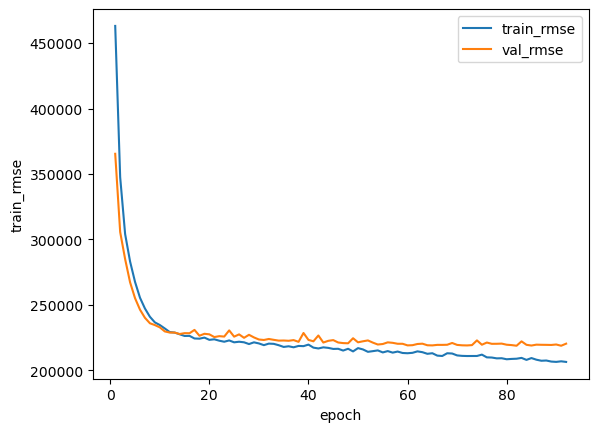

In [63]:
tb_full_model = pd.DataFrame(h.history)
tb_full_model["epoch"] = tb_full_model.index + 1
tb_full_model["train_rmse"] = np.sqrt(tb_full_model["loss"])
tb_full_model["val_rmse"] = np.sqrt(tb_full_model["val_loss"])
sns.lineplot(data=tb_full_model, x = "epoch", y = "train_rmse", label = "train_rmse")
sns.lineplot(data=tb_full_model, x = "epoch", y = "val_rmse", label = "val_rmse")

In [64]:
y_test_pred = full_model.predict([X_tb_test, X_img_test])
print(f"MAPE: {np.sqrt(mean_squared_error(y_test, y_test_pred))/y_test.mean()}")

97/97 [==============================] - 1s 8ms/step
MAPE: 0.31629097177940363
